# LETS GROW MORE DATA SCIENCE INTERSHIP(VIP)
# Name: Ritika J. Malviya
# Title:  Develop A Neural Network That Can Read Handwriting
# Level : Advance
# Batch: June
# Dataset link : https://en.wikipedia.org/wiki/MNIST_database 

In [1]:
# Importing Libraries
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset 
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

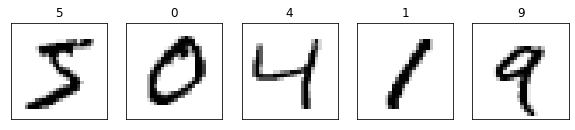

In [3]:
# Displaying some dataset images
fig, axes = plt.subplots(ncols=5, sharex=False,
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()   

In [4]:
# PreProcessing the data

In [5]:
print('Training images shape: ',x_train.shape)
print('Testing images shape: ',x_test.shape)

Training images shape:  (60000, 28, 28)
Testing images shape:  (10000, 28, 28)


In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [7]:
# #divide by 255 to normalize it to 0 to 1
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

In [8]:
# Creating the Model 

In [9]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [10]:
#CNN
cnn=keras.Sequential([
    layers.Conv2D(filters=48,kernel_size=(3,3),activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(500, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        27712     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [12]:
# Training the Model 
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 274s 145ms/step - loss: 0.1462 - accuracy: 0.9536
Epoch 2/10
1875/1875 [==============================] - 264s 141ms/step - loss: 0.0599 - accuracy: 0.9812
Epoch 3/10
1875/1875 [==============================] - 235s 125ms/step - loss: 0.0463 - accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 226s 121ms/step - loss: 0.0363 - accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 224s 120ms/step - loss: 0.0320 - accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 229s 122ms/step - loss: 0.0282 - accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 228s 122ms/step - loss: 0.0242 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 228s 121ms/step - loss: 0.0221 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 228s 122ms/step - loss: 0.0213 - accuracy: 0.9932
Epoch 10/10
1875/1875 [=======================

313/313 [==============================] - 15s 48ms/step
Predicted Value:  9
Successful prediction


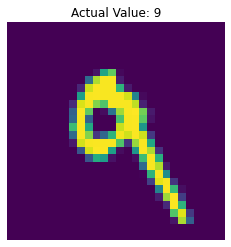

In [13]:
plt.imshow((tf.squeeze(x_test[7])))
plt.title('Actual Value: {}'.format(y_test[7]))
y_pred=cnn.predict(x_test)
y_pred[:5]

plt.axis('off')
print('Predicted Value: ',np.argmax(y_pred[7]))
if(y_test[7]==(np.argmax(y_pred[7]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 17s 54ms/step
Predicted Value:  3
Successful prediction


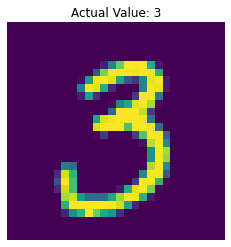

In [16]:
plt.imshow((tf.squeeze(x_test[90])))
plt.title('Actual Value: {}'.format(y_test[90]))
y_pred=cnn.predict(x_test)
y_pred[:5]

plt.axis('off')
print('Predicted Value: ',np.argmax(y_pred[90]))
if(y_test[90]==(np.argmax(y_pred[90]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')